## <center> CV </center>
#### <center> Assignment-2 </center>
<center> Submitted by Anjali Singh, 2020102004 </center>

In [2]:
# import cv2
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt

In [3]:
import cv2
from tqdm import tqdm

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
import sys
sys.path

['c:\\Users\\singh\\OneDrive - International Institute of Information Technology\\Documents\\Code\\CV\\A2',
 'c:\\Users\\singh\\miniconda3\\envs\\CV\\python39.zip',
 'c:\\Users\\singh\\miniconda3\\envs\\CV\\DLLs',
 'c:\\Users\\singh\\miniconda3\\envs\\CV\\lib',
 'c:\\Users\\singh\\miniconda3\\envs\\CV',
 '',
 'c:\\Users\\singh\\miniconda3\\envs\\CV\\lib\\site-packages',
 'c:\\Users\\singh\\miniconda3\\envs\\CV\\lib\\site-packages\\win32',
 'c:\\Users\\singh\\miniconda3\\envs\\CV\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\singh\\miniconda3\\envs\\CV\\lib\\site-packages\\Pythonwin']

In [6]:
import torch
from torchvision import datasets, transforms

print(torch.__version__)


2.2.1


#### Data Preparation 

In [7]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
# plt.imshow(trainset[0][0].squeeze().numpy(), cmap = 'gray')

# print(trainset[0][0].squeeze().numpy())

In [8]:
train_images = trainset.data.numpy()
train_labels = trainset.targets.numpy()

test_images = testset.data.numpy()
test_labels = testset.targets.numpy()

In [9]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, download=True)

In [10]:
train_images = mnist_train.data.numpy()
train_labels = mnist_train.targets.numpy()

test_images = mnist_test.data.numpy()
test_labels = mnist_test.targets.numpy()

## Q1: SIFT-BoVW-SVM

### part-1

In [11]:
# SIFT Detector and Descriptor 
np.random.seed(42)

# to extract features from an image
sift = cv2.SIFT_create()

def extract_sift_features(image):
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors


In [12]:

for test_image in test_images:
    test_keypoints, test_descriptors = extract_sift_features(test_image)
    
for i, train_image in enumerate(train_images):
        train_keypoints, train_descriptors = extract_sift_features(train_image)



<class 'list'>
2
torch.Size([64, 1, 28, 28])
torch.Size([64])
(1, 28, 28)
(28, 28, 1)


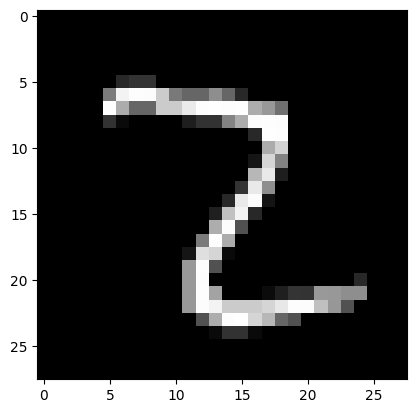

2


In [13]:
# next(iter(testloader)) # To inspect dataloader
for batch in trainloader:
    print(type(batch))
    print(len(batch))
    print(batch[0].shape)
    print(batch[1].shape)
    inp = batch[0] # Inp Data
    label = batch[1] # Labels
    for idx, img_data in enumerate(inp):
        img_np = img_data.detach().cpu().numpy()
        print(img_np.shape)
        img_ocv = np.transpose(img_np, (1,2,0))
        sample, _ = trainset[0]
        # keypoints, descriptors = extract_sift_features(sample)

        print(img_ocv.shape)
        plt.imshow(img_ocv, cmap='gray')
        plt.show()

        # img_with_keypoints = cv2.drawKeypoints(sample.squeeze().numpy(), keypoints, None)
        # plt.imshow(img_with_keypoints, cmap='gray')
        # plt.title('Image with SIFT Keypoints')
        # plt.show()

        label_np = label[idx].detach().cpu().numpy()
        print(label_np)
        break
    break

#### Bag of Visual Words Approach

In [53]:
# flatten the images for K-mean Clustering 
train_images_flatten = train_images.reshape(train_images.shape[0], -1)
test_images_flatten = test_images.reshape(test_images.shape[0], -1)

# no. of clusters = visual words 
num_clusters = 100

desc_arr=[]
for image in tqdm(train_images):
    keypoints,descriptors = sift.detectAndCompute(image,None)
    # arr_tmp=descriptors.reshape(-1,128)
    if descriptors is not None:
        desc_arr.append(descriptors)

desc_arr=np.concatenate(desc_arr,axis=0)
print(desc_arr.shape)


100%|██████████| 60000/60000 [01:07<00:00, 891.37it/s] 


(469496, 128)


In [19]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(desc_arr)
cluster_centers = kmeans.cluster_centers_


(469496,)


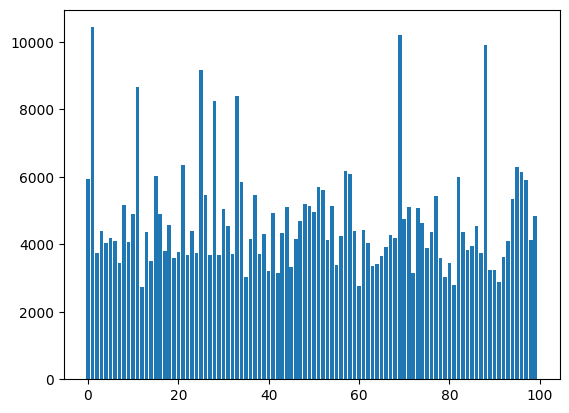

In [20]:
labels=kmeans.labels_
print(labels.shape)
label_val,label_freq=np.unique(labels,return_counts=True)
plt.bar(label_val,label_freq)
plt.show()


In [21]:
# For Training Set 
BoVW=np.zeros((train_images.shape[0],num_clusters))
for i,image in tqdm(enumerate(train_images),total=len(train_images)):
    keypoints,descriptors = sift.detectAndCompute(image,None)
    if descriptors is not None:
        idxs=kmeans.predict(descriptors)
        BoVW[i,idxs]+=1

BoVW[0]

100%|██████████| 60000/60000 [00:52<00:00, 1153.29it/s]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Linear SVM Model for 10-way Classification 

In [22]:
BoVWTest=np.zeros((test_images.shape[0],num_clusters))
for i,image in tqdm(enumerate(test_images),total=len(test_images)):
    keypoints,descriptors = sift.detectAndCompute(image,None)
    if descriptors is not None:
        idxs=kmeans.predict(descriptors)
        BoVWTest[i,idxs]+=1

100%|██████████| 10000/10000 [00:08<00:00, 1182.42it/s]


In [23]:
train_labels.shape

(60000,)

In [24]:
BoVW[:5,:].shape

(5, 100)

In [25]:
svm_model = SVC(kernel='linear', C=1.0, random_state=0)
svm_model.fit(BoVW, train_labels)

SVC(kernel='linear', random_state=0)

In [26]:
predictions = svm_model.predict(BoVWTest)
accuracy = accuracy_score(test_labels, predictions) * 100

print(f"Accuracy of the linear SVM model: {accuracy}%")

Accuracy of the linear SVM model: 74.57000000000001%


### part-2 

100%|██████████| 60000/60000 [01:24<00:00, 705.98it/s]


(469496, 128)
(469496,)


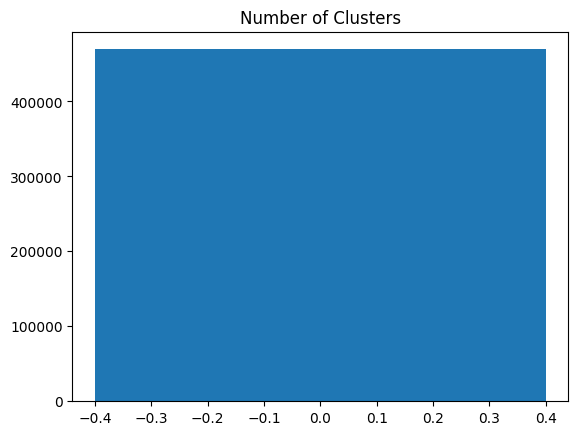

100%|██████████| 10000/10000 [00:19<00:00, 506.08it/s]


Accuracy of the linear SVM model: 11.43%


100%|██████████| 60000/60000 [01:17<00:00, 775.14it/s]


(469496, 128)
(469496,)


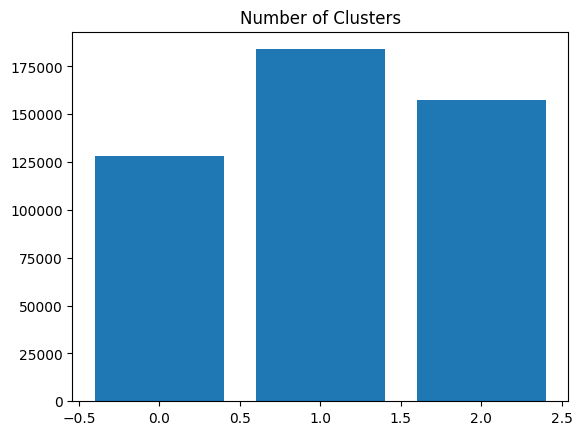

100%|██████████| 10000/10000 [00:29<00:00, 342.66it/s]


Accuracy of the linear SVM model: 18.14%


100%|██████████| 60000/60000 [01:14<00:00, 808.24it/s]


(469496, 128)
(469496,)


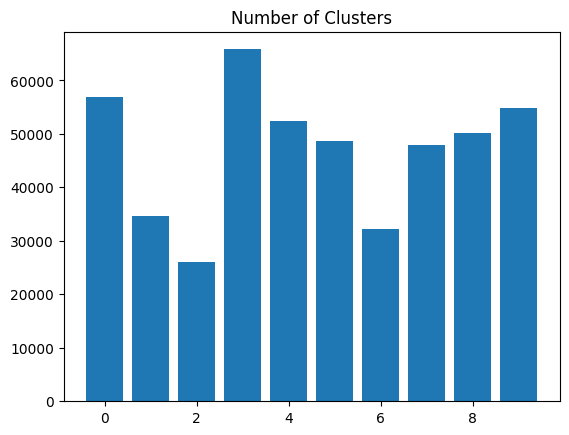

100%|██████████| 10000/10000 [00:19<00:00, 505.52it/s]


Accuracy of the linear SVM model: 35.93%


100%|██████████| 60000/60000 [01:38<00:00, 607.84it/s]


(469496, 128)
(469496,)


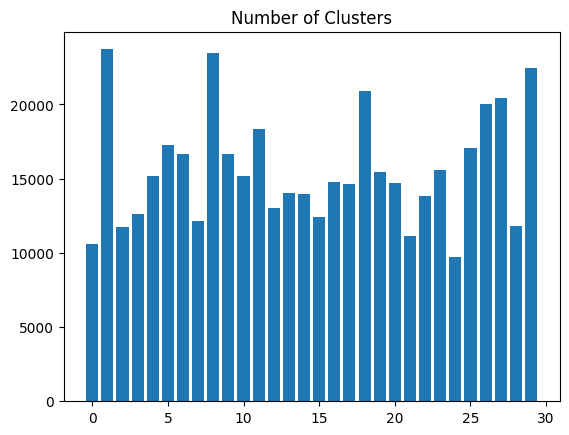

100%|██████████| 10000/10000 [00:25<00:00, 386.31it/s]


Accuracy of the linear SVM model: 59.730000000000004%


100%|██████████| 60000/60000 [02:13<00:00, 449.51it/s]


(469496, 128)
(469496,)


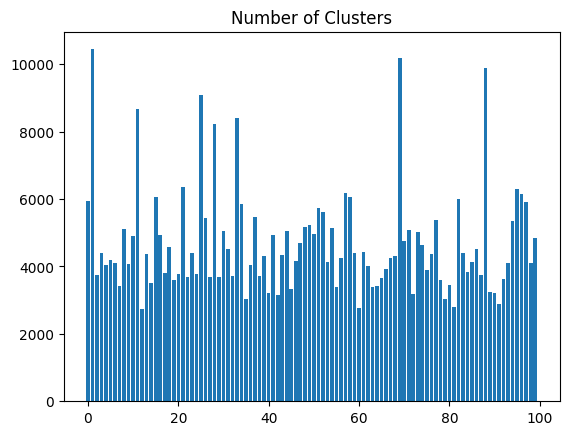

100%|██████████| 10000/10000 [00:27<00:00, 359.47it/s]


Accuracy of the linear SVM model: 74.56%


100%|██████████| 60000/60000 [01:21<00:00, 736.84it/s]


(469496, 128)
(469496,)


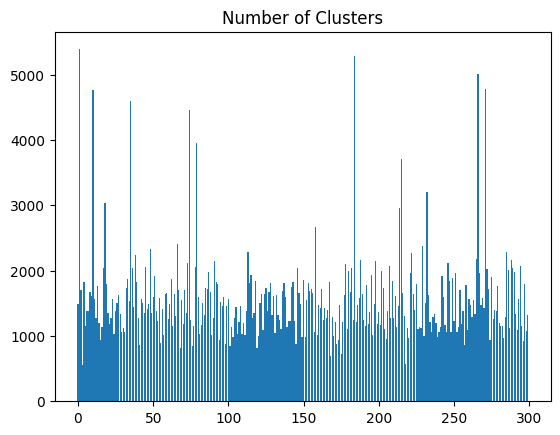

100%|██████████| 10000/10000 [00:31<00:00, 313.12it/s]


Accuracy of the linear SVM model: 82.55%


In [30]:
# Computing accuracies for different values of number of clusters 
 
accuracies = []

for num_clusters in [1, 3, 10, 30, 100, 300]:

    # descriptor array
    desc_arr=[]
    for image in tqdm(train_images):
        keypoints,descriptors = sift.detectAndCompute(image,None)
        # arr_tmp=descriptors.reshape(-1,128)
        if descriptors is not None:
            desc_arr.append(descriptors)

    desc_arr=np.concatenate(desc_arr, axis=0)
    print(desc_arr.shape)

    # finding k-means 
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(desc_arr)
    cluster_centers = kmeans.cluster_centers_

    labels=kmeans.labels_
    print(labels.shape)
    label_val,label_freq=np.unique(labels,return_counts=True)
    plt.title("Number of Clusters")
    plt.bar(label_val,label_freq)
    plt.show()

    BoVW = np.zeros((train_images.shape[0], num_clusters))
    for i, image in tqdm(enumerate(train_images), total = len(train_images)):
        keypoints, descriptors = sift.detectAndCompute(image, None)
        if descriptors is not None:
            idxs = kmeans.predict(descriptors)
            BoVW[i, idxs] += 1

    BoVW_test = np.zeros((test_images.shape[0], num_clusters))
    for i, image in tqdm(enumerate(test_images), total = len(test_images)):
        keypoints,descriptors = sift.detectAndCompute(image, None)
        if descriptors is not None:
            idxs = kmeans.predict(descriptors)
            BoVW_test[i, idxs] += 1

    svm_model = SVC(kernel = 'linear', C=1.0, random_state=0)
    svm_model.fit(BoVW, train_labels)

    predictions = svm_model.predict(BoVW_test)
    accuracy = accuracy_score(test_labels, predictions) * 100

    print(f"Accuracy of the linear SVM model: {accuracy}%")

In [ ]:
accuracies.append(accuracy)
# Plotting the classification accuracy against the number of clusters

plt.figure(figsize=(10, 6))
plt.plot([1, 3, 10, 30, 100, 300], accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Number of Clusters')
plt.ylabel('Classification Accuracy (%)')
plt.title('Classification Accuracy vs. Number of Clusters')
plt.grid(True)
plt.show()

#### Observations 

- As the number of cluster increases, the model can capture more detailed visual information which leads to improved better accuracy.
- But if we increase the number of clusters too much, it could lead to overfitting with increased complexity to compute without significant gains in accuracy. 
- The plot helps us identify an optimal balance between model complexity and performance. 

### part-3

  0%|          | 0/60000 [00:00<?, ?it/s]

100%|██████████| 60000/60000 [01:09<00:00, 866.08it/s]


(469496, 128)
(469496,)


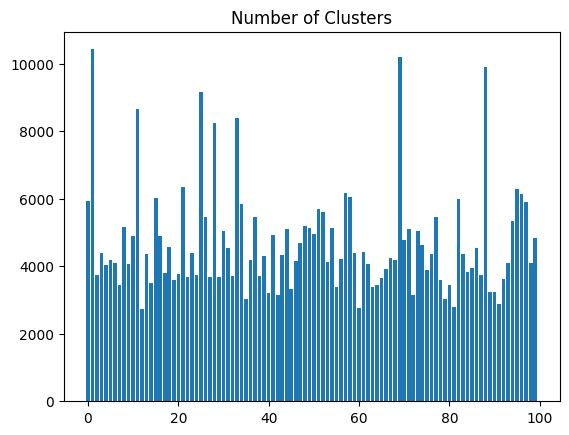

100%|██████████| 10000/10000 [00:18<00:00, 529.71it/s]


Accuracy of the linear SVM model: 74.56%


100%|██████████| 10000/10000 [00:18<00:00, 529.13it/s]


Accuracy of the linear SVM model: 74.62%


100%|██████████| 60000/60000 [01:17<00:00, 776.26it/s]


(469496, 128)
(469496,)


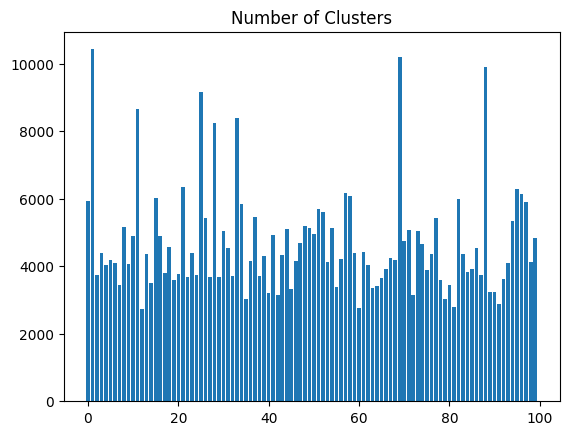

100%|██████████| 10000/10000 [00:19<00:00, 524.59it/s]


Accuracy of the linear SVM model: 74.64%


100%|██████████| 10000/10000 [00:19<00:00, 515.20it/s]


Accuracy of the linear SVM model: 74.57000000000001%


In [56]:
# Defining a list of hyperparameters to experiment with

hyperparameters = {
    'sift_detector': {
        'num_keypoints': [100, 200, 300],
        'scale_levels': [3, 4, 5],
        'edge_threshold': [10, 20, 30],
        'contrast_threshold': [0.04, 0.06, 0.08]
    },
    'sift_descriptor': {
        'descriptor_size': [128, 256],
        'num_orientation_bins': [8, 12],
        'gaussian_smoothing': [1.0, 1.5]
    },
    'kmeans_clustering': {
        'num_clusters': [800]  # Based on previous question
    },
    'svm_model': {
        'C': [1.0, 10.0],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Iterate over different hyperparameter settings and evaluate classification accuracy
# for num_keypoints in hyperparameters['sift_detector']['num_keypoints']:
    # Update SIFT detector parameters and compute histograms
    
for descriptor_size in hyperparameters['sift_descriptor']['descriptor_size']:
    # Update SIFT descriptor parameters and compute histograms

    num_clusters = 100
    desc_arr=[]
    for image in tqdm(train_images):
        keypoints,descriptors = sift.detectAndCompute(image,None)
        # arr_tmp=descriptors.reshape(-1,128)
        if descriptors is not None:
            desc_arr.append(descriptors)
            
    desc_arr=np.concatenate(desc_arr, axis=0)
    print(desc_arr.shape)

    # finding k-means 
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(desc_arr)
    cluster_centers = kmeans.cluster_centers_

    labels=kmeans.labels_
    print(labels.shape)
    label_val,label_freq=np.unique(labels,return_counts=True)
    plt.title("Number of Clusters")
    plt.bar(label_val,label_freq)
    plt.show()
        
    for C in hyperparameters['svm_model']['C']:
        # Update SVM model parameters and train the model
        BoVW = np.zeros((train_images.shape[0], num_clusters))
        for i, image in tqdm(enumerate(train_images), total = len(train_images)):
            keypoints, descriptors = sift.detectAndCompute(image, None)
            if descriptors is not None:
                idxs = kmeans.predict(descriptors)
                BoVW[i, idxs] += 1

        BoVW_test = np.zeros((test_images.shape[0], num_clusters))
        for i, image in tqdm(enumerate(test_images), total = len(test_images)):
            keypoints,descriptors = sift.detectAndCompute(image, None)
            if descriptors is not None:
                idxs = kmeans.predict(descriptors)
                BoVW_test[i, idxs] += 1

        svm_model = SVC(kernel = 'linear', C=C, random_state=0)
        svm_model.fit(BoVW, train_labels)

        predictions = svm_model.predict(BoVW_test)
        accuracy = accuracy_score(test_labels, predictions)*100

        print(f"Accuracy of the linear SVM model: {accuracy}%")


#### Observations:-
Over here, I've changed the values of descriptor value from 128 to 256 and the value of 'C' in the SVM function from 1 to 10. There is a small reduction in the accuracy of SVM Model that we can observe. 

## Q2: CNNs and Transformers 

### part-1

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [16]:
# !pip install wandb
import wandb # for logging with weights and biases

import os
os.environ["WANDB_API_KEY"] = "199ec53fd2838e4ea3f28dbc1afe846632e73573"

In [17]:
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [18]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 16*4*4)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [19]:
# Loading model on GPU/CPU
model = LeNet()
model = model.to(device)

In [20]:
# training the model 
def train(model, train_loader, optimizer, criterion,device='cuda'):
    model.train()
    running_loss = 0.0

    # with torch.cuda.amp.autocast(dtype=torch.float32):
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    return running_loss / len(train_loader)


In [21]:
# testing the model 
def test(model, test_loader, criterion,device='cuda'):
    running_loss = 0.0
    correct_predictions = 0

    model.eval()
    with torch.no_grad():#, torch.cuda.amp.autocast(dtype=torch.float32):
        for inputs, labels in test_loader:
            print(inputs.shape)
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct_predictions += (predicted == labels).sum().item()

    accuracy = correct_predictions / len(test_loader.dataset)
    return running_loss / len(test_loader), accuracy

In [22]:
## Hyperparameters
learning_rate = 0.01
epochs = 10

In [24]:
wandb.init(
    # set the wandb project where this run will be logged
    project="mnist_lenet_training",
    
    # track hyperparameters and run metadata
    config={
        "learning_rate": learning_rate,
        "architecture": "CNN",
        "dataset": "CIFAR-100",
        "epochs": epochs,
    }
)

In [25]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [35]:
# Training loop with logging 
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(epochs):
    train_loss = train(model, trainloader, optimizer, criterion)
    test_loss, test_accuracy = test(model, testloader, criterion)

    wandb.log({'epoch': epoch+1,
               'train_loss': train_loss,
               'test_loss': test_loss,
               'test_accuracy': test_accuracy})
    
    train_losses.append(train_loss)
    test_losses.append(test_loss) 
    test_accuracies.append(test_accuracy)

print("Train Losses:", train_losses)
print("Test Losses:", test_losses)
print("Test Accuracies:", test_accuracies)

wandb.finish()

torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

epoch,▁▁▂▃▃▄▅▆▆▇█
test_accuracy,▁▅▅▃▇███▇█▆
test_loss,█▅▄▄▁▁▁▁▂▁▄
train_loss,█▃▂▂▂▁▁▁▁▁▁
epoch,10
test_accuracy,0.9844
test_loss,0.05499
train_loss,0.01508


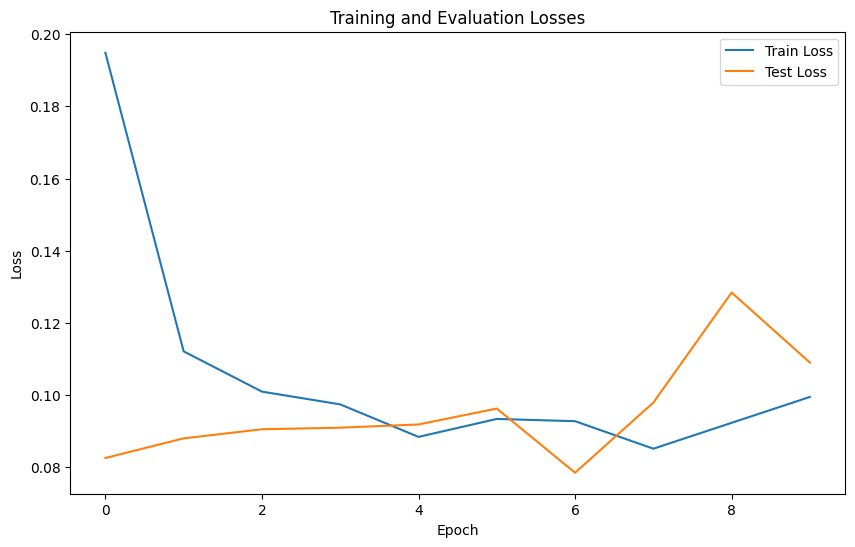

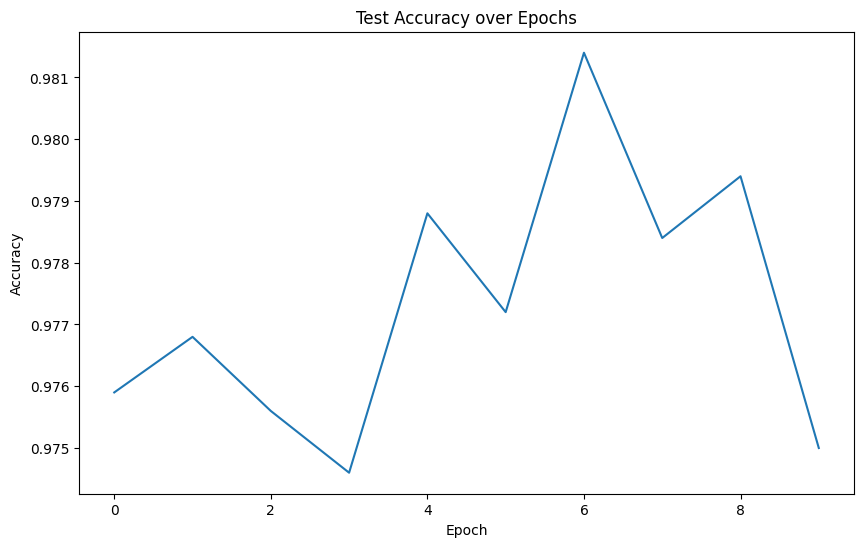

In [201]:
# Retrieve logged data from Weights & Biases or use custom plotting libraries to visualize training and evaluation metrics.

# Plotting Losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Losses')
plt.legend()
plt.show()

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(test_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.show()


### part-2

In [26]:
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
optimizers = ['Adam', 'SGD']

In [27]:
wandb.init(
    # set the wandb project where this run will be logged
    project="mnist_lenet_training",
    
    # track hyperparameters and run metadata
    config={
        "learning_rate": learning_rate,
        "architecture": "CNN",
        "dataset": "CIFAR-100",
        "epochs": epochs,
    }
)

In [ ]:
num_epochs = 10 
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for optimizer_name in optimizers:
            wandb.init(
            # set the wandb project where this run will be logged
            project="mnist_lenet_training",
            
            # track hyperparameters and run metadata
            config={
                "learning_rate": learning_rate,
                "architecture": "CNN",
                "dataset": "CIFAR-100",
                "epochs": epochs,
                "batch_size":batch_size,
                "optimizer":optimizer
            }
        )
            model = LeNet().to(device)
            # Define your CNN model, optimizer, and criterion here
            if optimizer_name == 'Adam':
                optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
            elif optimizer_name == 'SGD':
                optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

            # Training loop with the current hyperparameters
            for epoch in range(num_epochs):
                # Log or store the results for analysis    
                train_loss = train(model, trainloader, optimizer, criterion)
                test_loss, test_accuracy = test(model, testloader, criterion)

                wandb.log({'epoch': epoch+1,
                        'train_loss': train_loss,
                        'test_loss': test_loss,
                        'test_accuracy': test_accuracy})
                
                train_losses.append(train_loss)
                test_losses.append(test_loss) 
                test_accuracies.append(test_accuracy)

            # wandb.finish()

#### Trends in classification accuracy
- as the number of epochs increases, the model accuracy enhances but if there are too many epochs, it can lead to overfitting
- using smaller batch size reduces memory requirements during training 
- Exponential decay in learning rates can help models converge to optimal solutions and helps in avoiding getting stuck in local minima 


#### Hyperparameters that are most important
- number of epochs: by choosing an optimal no. of epochs, we can balance underfitting and overfitting,
- learning rate: tuning the learning rate helps in model convergence and generalization,
- and batch size: changing this value affects memory usage and can influence how quickly a model converges

### part-3

In [28]:
# Training and evaluating the CNN model 

test_loss, test_accuracy = test(model, testloader, criterion, device = 'cuda')
print(f'CNN Model - Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

##### Explain the differences: 
- Accuracy with the SIFT-BoVW-SVM approach was 0.7457 (74.57%) that's done in the earlier parts and the accuracy using the CNN architecture is 0.8604.
- The LeNet architecture has given better accuracy and efficiency in learning the features compared to SIFT-BoVW-SVM. 
- CNNs require less time for training and inference compared to the SIFT methodology.
- The efficiency is due to GPU computing. 

### part-4

In [37]:
def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [38]:
class LeNetDoubleConv(nn.Module):
    def __init__(self):
        super(LeNetDoubleConv, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 32, 3) # 3 is the filter size 
        self.fc1 = nn.Linear(32*1*1, 120) # 32*1*1: final output size, 120 is the final output dimension in applying MLP 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, (2, 2))
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, (2, 2))
        x = torch.relu(self.conv3(x))  # Additional Convolutional Layer
        x = torch.max_pool2d(x, (2, 2))
        x = x.view(-1, self.num_flat_features(x))
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [39]:
model_double_conv = LeNetDoubleConv()
model_double_conv = model_double_conv.to(device)

In [40]:
# Training loop with logging 
train_losses_double_conv = []
test_losses_double_conv = []
test_accuracies_double_conv = []

batch_size = 3

for epoch in range(epochs):
    train_loss = train(model_double_conv, trainloader, optimizer, criterion)
    test_loss, test_accuracy = test(model_double_conv, testloader, criterion)

    wandb.init(
            # set the wandb project where this run will be logged
            project = "mnist_lenet_training",
            
            # track hyperparameters and run metadata
            config = {
                "learning_rate": learning_rate,
                "architecture": "CNN",
                "dataset": "CIFAR-100",
                "epochs": epochs,
                "batch_size":batch_size,
                "optimizer":optimizer
            }
        )
                                         
    wandb.log({'epoch': epoch+1,
               'train_loss': train_loss,
               'test_loss': test_loss,
               'test_accuracy': test_accuracy})

train_losses_double_conv.append(train_loss)
test_losses_double_conv.append(test_loss) 
test_accuracies_double_conv.append(test_accuracy)

print("Train Losses:", train_losses)
print("Test Losses:", test_losses)
print("Test Accuracies:", test_accuracies)

wandb.finish()

torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

epoch,▁█
test_accuracy,▁█
test_loss,█▁
train_loss,█▁
epoch,2
test_accuracy,0.9832
test_loss,0.04798
train_loss,0.0706


torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,1
test_accuracy,0.0892
test_loss,2.30999
train_loss,2.30907


torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,2
test_accuracy,0.0892
test_loss,2.30992
train_loss,2.30906


torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,3
test_accuracy,0.0892
test_loss,2.30997
train_loss,2.30908


torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,4
test_accuracy,0.0892
test_loss,2.30976
train_loss,2.30906


torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,5
test_accuracy,0.0892
test_loss,2.30987
train_loss,2.30907


torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,6
test_accuracy,0.0892
test_loss,2.30999
train_loss,2.30909


torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,7
test_accuracy,0.0892
test_loss,2.30998
train_loss,2.30908


torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,8
test_accuracy,0.0892
test_loss,2.30988
train_loss,2.30907


torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,9
test_accuracy,0.0892
test_loss,2.30994
train_loss,2.30907


Train Losses: [0.07138962544295302, 0.05131164297852705, 0.04009614761674038, 0.035673286757560506, 0.030801773703816447, 0.02468003309198416, 0.021823521204985496, 0.019769998730739674, 0.017008793235980847, 0.015079909263048452, 0.2435606284114693, 0.07059893694652646]
Test Losses: [0.0579056168052184, 0.05331737371784439, 0.057657080067019126, 0.03705449507031946, 0.036194284842868636, 0.036118245714660706, 0.0372415146683669, 0.04016251032589935, 0.03903140750610578, 0.05498725546430871, 0.07255438698016724, 0.047981029552864325]
Test Accuracies: [0.9822, 0.9826, 0.9798, 0.9872, 0.9885, 0.9885, 0.9889, 0.9877, 0.9893, 0.9844, 0.9775, 0.9832]


epoch,▁
test_accuracy,▁
test_loss,▁
train_loss,▁
epoch,10
test_accuracy,0.0892
test_loss,2.31007
train_loss,2.30906


#### Observations:- 
- Train and test loss have reduced significantly and the accuracy has improved a lot. 
- If we double the number of convolutional layers, it leads to a significant improvement in performance by capturing more complex patterns and features in the data. 
- It helps in extraction of higher-level features, which enhances the ability of network to learn intricate pattersn in the data. 

### part-5

In [ ]:
from sklearn.model_selection import train_test_split

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Define the different training sample sizes
batch_sizes = [600, 1800, 6000, 18000, 60000]

for size in batch_sizes:
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=size, shuffle=True)
    wandb.init(
            # set the wandb project where this run will be logged
            project="mnist_lenet_training",
            
            # track hyperparameters and run metadata
            config={
                "learning_rate": learning_rate,
                "architecture": "CNN",
                "dataset": "CIFAR-100",
                "epochs": epochs,
                "batch_size":batch_size,
                "optimizer":optimizer
            }
        )

    # Training model
    # number of epochs I'm keeping here is 2, taking a lot of time to run :'(
    for epoch in range(2):
        train_loss = train(model, trainloader, optimizer, criterion)
        test_loss, test_accuracy = test(model, testloader, criterion)

        wandb.log({'epoch': epoch+1,
                    'train_loss': train_loss,
                    'test_loss': test_loss,
                    'test_accuracy': test_accuracy})
                
        train_losses.append(train_loss)
        test_losses.append(test_loss) 
        test_accuracies.append(test_accuracy)

    

    print("Train Losses:", train_losses)
    print("Test Losses:", test_losses)
    print("Test Accuracies:", test_accuracies)
    
    
print(f"Training Size: {size}, Test Accuracy: {accuracy}")


#### Observations:-

The classification accuracy improves as the number of training samples increases.

### part-6

In [ ]:
import torch.nn.functional as F

In [41]:
class TransformerEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_heads, num_layers, dropout=0.1):
        super(TransformerEncoder, self).__init__()
        
        self.embedding = nn.Linear(input_dim, hidden_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.out_lin=nn.Linear(hidden_dim,10)
        self.Softmax=nn.Softmax(dim=-1)
    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # Change the dimensions for Transformer input
        output = self.transformer_encoder(x)
        output = output.permute(1, 0, 2)  # Change back to original dimensions
        output=self.out_lin(output)
        output=self.Softmax(output)
        # output=torch.argmax(output,dim=-1).to(torch.float32)
        # print('Final Output shape:',output.shape)
        return output.squeeze(-2)


In [169]:
input_dim = 28*28  # taking the MNIST image size
hidden_dim = 256
num_heads = 8
num_layers = 2

transformer_model = TransformerEncoder(input_dim=input_dim, hidden_dim=hidden_dim,
                                        num_heads=num_heads, num_layers=num_layers)


In [170]:
transformer_optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001)
transformer_criterion = nn.CrossEntropyLoss()

In [171]:
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs=inputs.reshape(inputs.shape[0],inputs.shape[1],-1)
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    return running_loss / len(train_loader)

In [172]:
def test(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs=inputs.reshape(inputs.shape[0],inputs.shape[1],-1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct_predictions += (predicted == labels).sum().item()

    accuracy = correct_predictions / len(test_loader.dataset)

    return running_loss / len(test_loader), accuracy

In [173]:
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(transformer_model, trainloader, transformer_optimizer, transformer_criterion)
    test_loss, test_accuracy = test(transformer_model, testloader, criterion)

    print(f'Epoch {epoch+1}: Train Loss - {train_loss:.4f}, Test Loss - {test_loss:.4f}, Test Accuracy - {test_accuracy:.4f}')


Epoch 1: Train Loss - 1.8070, Test Loss - 1.6890, Test Accuracy - 0.7723
Epoch 2: Train Loss - 1.6844, Test Loss - 1.6374, Test Accuracy - 0.8234
Epoch 3: Train Loss - 1.6729, Test Loss - 1.7169, Test Accuracy - 0.7435
Epoch 4: Train Loss - 1.6681, Test Loss - 1.6815, Test Accuracy - 0.7783
Epoch 5: Train Loss - 1.6917, Test Loss - 1.6360, Test Accuracy - 0.8246
Epoch 6: Train Loss - 1.6688, Test Loss - 1.6423, Test Accuracy - 0.8179
Epoch 7: Train Loss - 1.6614, Test Loss - 1.6384, Test Accuracy - 0.8215
Epoch 8: Train Loss - 1.6476, Test Loss - 1.6320, Test Accuracy - 0.8287
Epoch 9: Train Loss - 1.6462, Test Loss - 1.6348, Test Accuracy - 0.8262
Epoch 10: Train Loss - 1.6503, Test Loss - 1.6127, Test Accuracy - 0.8479


- Accuracy for CNN is 86.4% and the best accuracy for transformer encoder is 84.79%. 

- ViT models show better performance than CNNs.
- ViTs require large datasets for pre-training, making them data-intensive compared to CNNs.
- ViTs offer higher accuracy.  

In [42]:
from torch.nn import TransformerEncoder, TransformerEncoderLayer

In [ ]:
class ViTTransformer(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ViTTransformer, self).__init__()
        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(input_dim)
        encoder_layers = TransformerEncoderLayer(d_model=input_dim, nhead=2)
        self.transformer_encoder = TransformerEncoder(encoder_layers, num_layers=2)
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, src):
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src)
        output = self.fc(output)
        return output

# Instantiate the ViTTransformer model
model_transformer = ViTTransformer(input_dim=512, num_classes=10)